<a href="https://colab.research.google.com/github/weirdrazak/Car-Prediction-Using-Linear-Regression-/blob/main/Car_Prediction_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
data = pd.read_excel("./cars.xls")

# Data Preprocessing

In [3]:
data.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,US
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,US
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,US
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,US


In [4]:
data.tail(10)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
384,chrysler lebaron medallion,26.0,4,156.0,92.0,2585,14.5,82,US
385,ford granada l,22.0,6,232.0,112.0,2835,14.7,82,US
386,toyota celica gt,32.0,4,144.0,96.0,2665,13.9,82,Japan
387,dodge charger 2.2,36.0,4,135.0,84.0,2370,13.0,82,US
388,chevrolet camaro,27.0,4,151.0,90.0,2950,17.3,82,US
389,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,US
390,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,Europe
391,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,US
392,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,US
393,chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,US


In [5]:
data.isnull().sum()

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      2
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

#

In [6]:
data.loc[~data.Horsepower.apply(np.isreal)]

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin


In [7]:
data.loc[~data.Horsepower.apply(np.isreal), 'Horsepower']=np.nan

In [8]:
data['Horsepower'].replace(0, np.nan, inplace=True)

In [9]:
data.loc[350]

Model           renault 18i
MPG                    34.5
Cylinders                 4
Displacement          100.0
Horsepower              NaN
Weight                 2320
Acceleration           15.8
Year                     81
Origin               Europe
Name: 350, dtype: object

# Filling Null Values with Mean or Median

In [10]:
data['Horsepower']=data['Horsepower'].fillna(data['Horsepower'].mean().round())

In [11]:
data.loc[350]

Model           renault 18i
MPG                    34.5
Cylinders                 4
Displacement          100.0
Horsepower            104.0
Weight                 2320
Acceleration           15.8
Year                     81
Origin               Europe
Name: 350, dtype: object

In [12]:
data.dtypes

Model            object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Year              int64
Origin           object
dtype: object

In [13]:
data['Horsepower'] = data['Horsepower'].astype('int64')
data.dtypes

Model            object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Year              int64
Origin           object
dtype: object

# Exploring the data

In [14]:
data.shape

(394, 9)

In [15]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,23.472843,5.464467,194.062183,104.467005,2976.060914,15.554569,76.007614
std,7.805051,1.704658,104.508345,38.393108,847.891143,2.763179,3.695461
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.125000,4.000000,105.000000,75.250000,2226.500000,13.800000,73.000000
50%,23.000000,4.000000,151.000000,94.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,265.750000,125.000000,3612.000000,17.075000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Non-Graphical Univariate Analysis

In [16]:
data['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [17]:
data['Cylinders'].value_counts()

4    201
8    103
6     83
3      4
5      3
Name: Cylinders, dtype: int64

In [18]:
df_4cyl = data[(data['Cylinders']==4)]
df_4cyl.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,201.000000,201.0,201.000000,201.000000,201.00000,201.000000,201.000000
mean,29.278607,4.0,109.828358,78.537313,2308.81592,16.597512,77.074627
std,5.671595,0.0,21.479796,14.675144,345.01703,2.387958,3.745584
min,18.000000,4.0,68.000000,46.000000,1613.00000,11.600000,70.000000
25%,25.000000,4.0,91.000000,68.000000,2050.00000,14.800000,74.000000
50%,28.400000,4.0,105.000000,78.000000,2234.00000,16.200000,78.000000
75%,33.000000,4.0,121.000000,89.000000,2565.00000,18.000000,80.000000
max,46.600000,4.0,156.000000,115.000000,3270.00000,24.800000,82.000000


# Graphical Univariate Analysi

<Axes: >

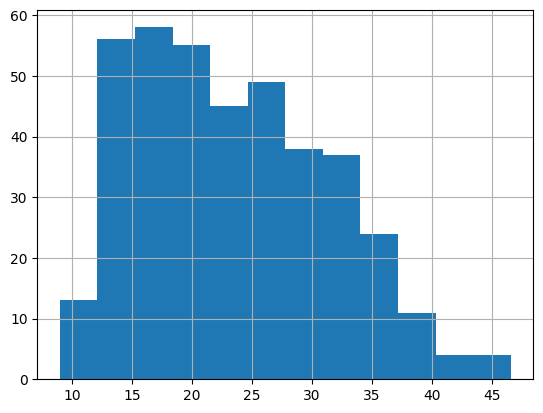

In [19]:
data['MPG'].hist(bins=12)

<Figure size 800x500 with 0 Axes>

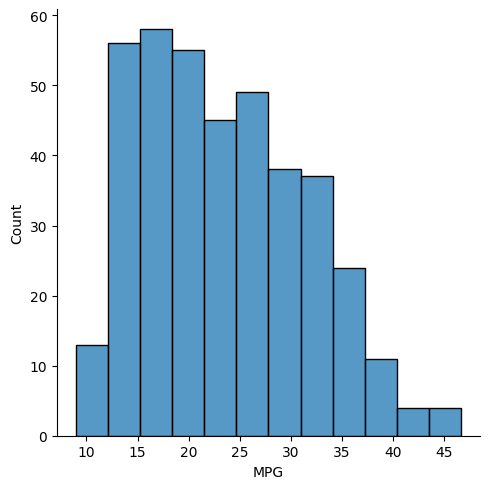

In [20]:
plt.figure(figsize=(8,5))
plt.tight_layout()
sns.displot(data['MPG'])

# Box Plot

<Axes: >

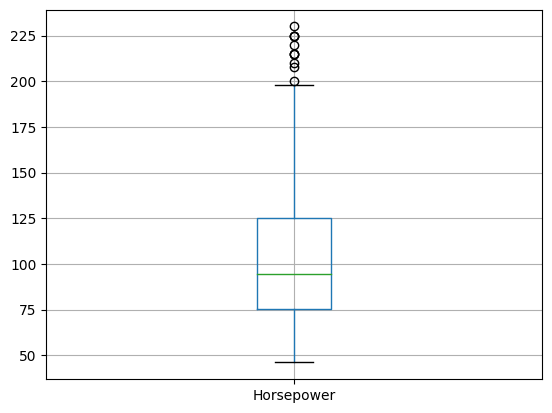

In [21]:
data.boxplot(column='Horsepower')

<Axes: title={'center': 'Horsepower'}, xlabel='Cylinders'>

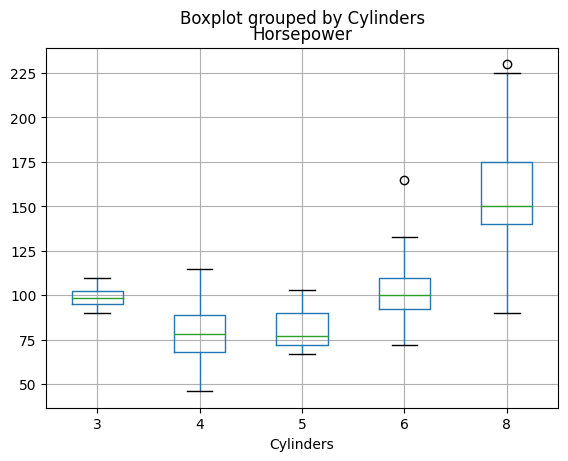

In [22]:
data.boxplot(column='Horsepower', by='Cylinders')

# Dealing with outliers

# Removing outliers

In [23]:
len(data['Horsepower'])

394

In [24]:
upper=data['Horsepower'].quantile(1-0.2)
upper

140.0

In [25]:
mask=(data['Horsepower']<upper)

In [26]:
data_1 = data[mask]
len(data_1)

310

<Axes: xlabel='Horsepower'>

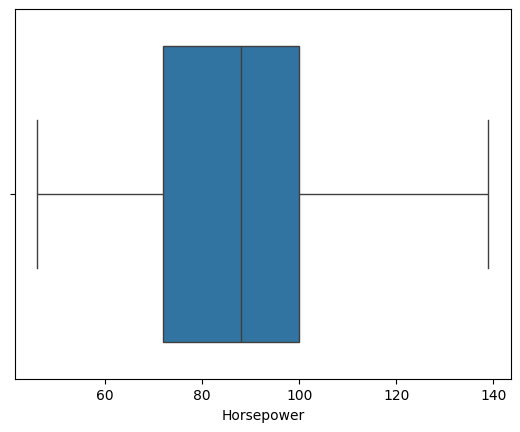

In [27]:
sns.boxplot(x=data_1['Horsepower'])

<Axes: xlabel='count', ylabel='Origin'>

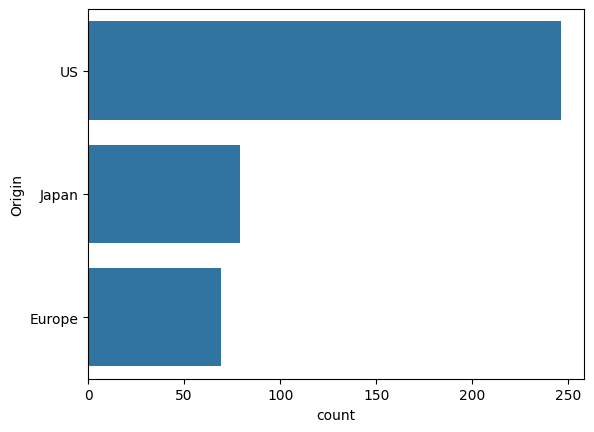

In [28]:
sns.countplot(data['Origin'])

# Non-Graphical Bivariate anlysis

In [29]:
data.corr()['MPG'].sort_values()

<ipython-input-29-293c7c0b40bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['MPG'].sort_values()


Weight         -0.832279
Displacement   -0.805249
Cylinders      -0.777138
Horsepower     -0.776481
Acceleration    0.420574
Year            0.580384
MPG             1.000000
Name: MPG, dtype: float64

# Grapical Bivariate Analysis

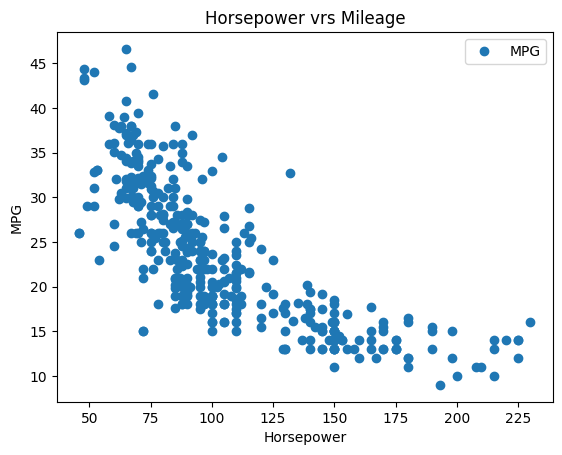

In [30]:
data.plot(x='Horsepower', y='MPG', style='o')
plt.title('Horsepower vrs Mileage')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

In [31]:
MPG=data['MPG']

array([[<Axes: xlabel='MPG', ylabel='MPG'>,
        <Axes: xlabel='Cylinders', ylabel='MPG'>,
        <Axes: xlabel='Displacement', ylabel='MPG'>,
        <Axes: xlabel='Horsepower', ylabel='MPG'>,
        <Axes: xlabel='Weight', ylabel='MPG'>,
        <Axes: xlabel='Acceleration', ylabel='MPG'>,
        <Axes: xlabel='Year', ylabel='MPG'>],
       [<Axes: xlabel='MPG', ylabel='Cylinders'>,
        <Axes: xlabel='Cylinders', ylabel='Cylinders'>,
        <Axes: xlabel='Displacement', ylabel='Cylinders'>,
        <Axes: xlabel='Horsepower', ylabel='Cylinders'>,
        <Axes: xlabel='Weight', ylabel='Cylinders'>,
        <Axes: xlabel='Acceleration', ylabel='Cylinders'>,
        <Axes: xlabel='Year', ylabel='Cylinders'>],
       [<Axes: xlabel='MPG', ylabel='Displacement'>,
        <Axes: xlabel='Cylinders', ylabel='Displacement'>,
        <Axes: xlabel='Displacement', ylabel='Displacement'>,
        <Axes: xlabel='Horsepower', ylabel='Displacement'>,
        <Axes: xlabel='Weight', ylab

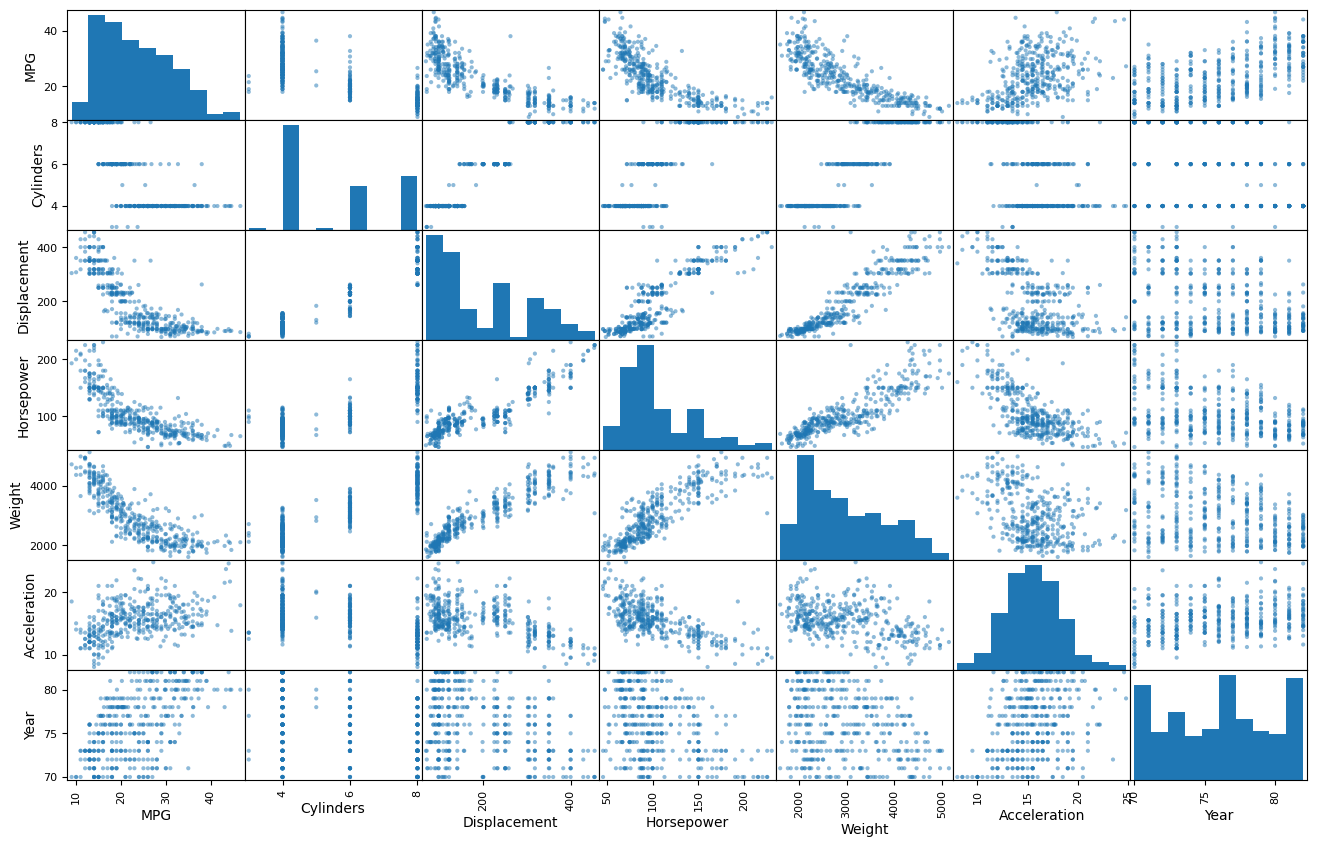

In [32]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(16,10), alpha=0.5,diagonal='hist')

<ipython-input-33-0723b39316eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


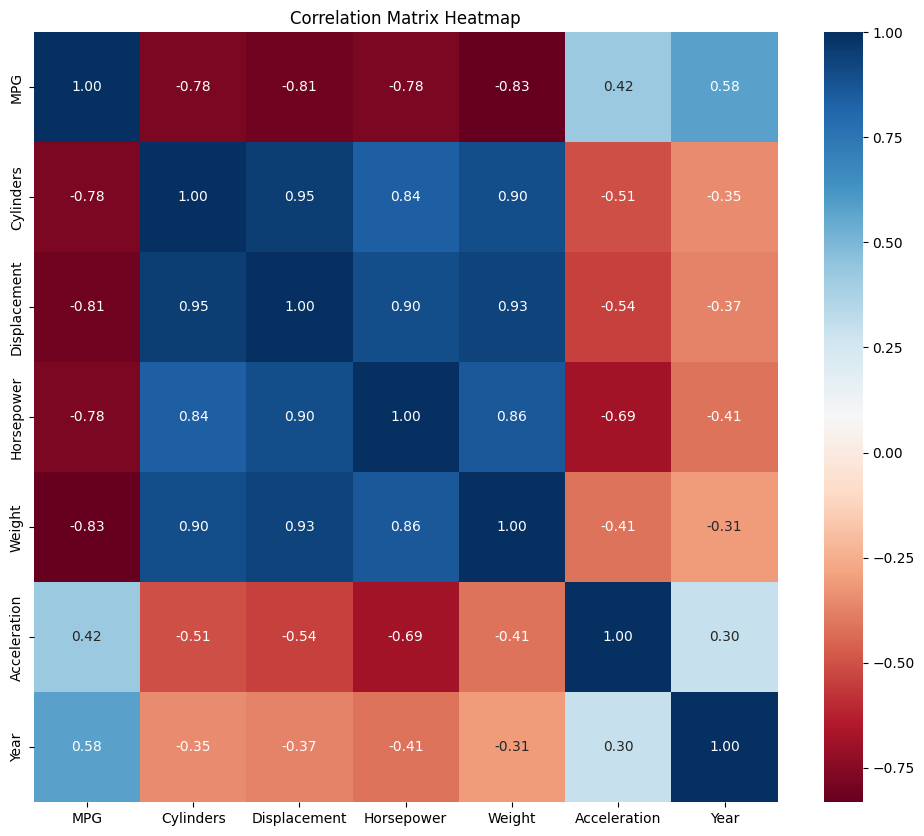

In [33]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='RdBu', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

# Setting up data: Features And Target Variable

In [34]:
data = pd.get_dummies(data,columns=['Origin'])

In [35]:
columns_to_consider = ['Displacement','Horsepower','Weight','Acceleration','Year','Origin_Europe','Origin_Japan','Origin_US']

In [36]:
X=data[columns_to_consider].values
y=data['MPG'].values

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
X_test.shape

(79, 8)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Define and Train model

In [41]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [42]:
columns_to_consider.append('Intercept')

In [43]:
columns_to_consider

['Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Year',
 'Origin_Europe',
 'Origin_Japan',
 'Origin_US',
 'Intercept']

In [44]:
coeff_df = pd.DataFrame({'Predictor':columns_to_consider, 'Coefficient':np.append(regression_model.coef_,regression_model.intercept_)})

In [45]:
coeff_df

,Predictor,Coefficient
0,Displacement,0.020638
1,Horsepower,-0.023662
2,Weight,-0.007083
3,Acceleration,0.066946
4,Year,0.791481
5,Origin_Europe,1.000795
6,Origin_Japan,0.857662
7,Origin_US,-1.858458
8,Intercept,-17.346309


#Predicted Output

In [46]:
y_pred=regression_model.predict(X_test)

In [47]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1=df.head(25)

# Visual Comparison

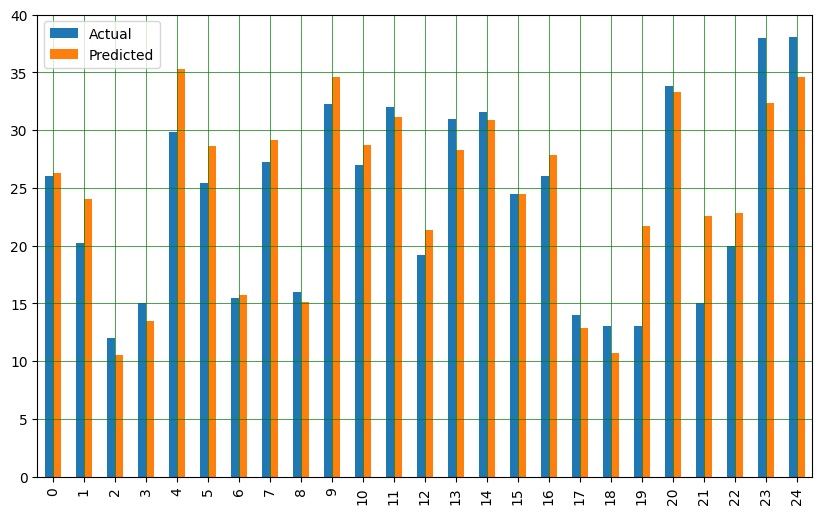

In [48]:
df1.plot(kind='bar', figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
plt.show()

# Root Mean Square Error

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.287222893506919
Mean Squared Error: 8.933808411017635
Root Mean Squared Error: 2.988947709649273


# Improvising Performance By Selecting Cylinder with value 4

In [50]:
df_4cyl.shape

(201, 9)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='MPG', ylabel='MPG'>,
        <Axes: xlabel='Cylinders', ylabel='MPG'>,
        <Axes: xlabel='Displacement', ylabel='MPG'>,
        <Axes: xlabel='Horsepower', ylabel='MPG'>,
        <Axes: xlabel='Weight', ylabel='MPG'>,
        <Axes: xlabel='Acceleration', ylabel='MPG'>,
        <Axes: xlabel='Year', ylabel='MPG'>],
       [<Axes: xlabel='MPG', ylabel='Cylinders'>,
        <Axes: xlabel='Cylinders', ylabel='Cylinders'>,
        <Axes: xlabel='Displacement', ylabel='Cylinders'>,
        <Axes: xlabel='Horsepower', ylabel='Cylinders'>,
        <Axes: xlabel='Weight', ylabel='Cylinders'>,
        <Axes: xlabel='Acceleration', ylabel='Cylinders'>,
        <Axes: xlabel='Year', ylabel='Cylinders'>],
       [<Axes: xlabel='MPG', ylabel='Displacement'>,
        <Axes: xlabel='Cylinders', ylabel='Displacement'>,
        <Axes: xlabel='Displacement', ylabel='Displacement'>,
        <Axes: xlabel='Horsepower', ylabel='Displacement'>,
        <Axes: xlabel='Weight', ylab

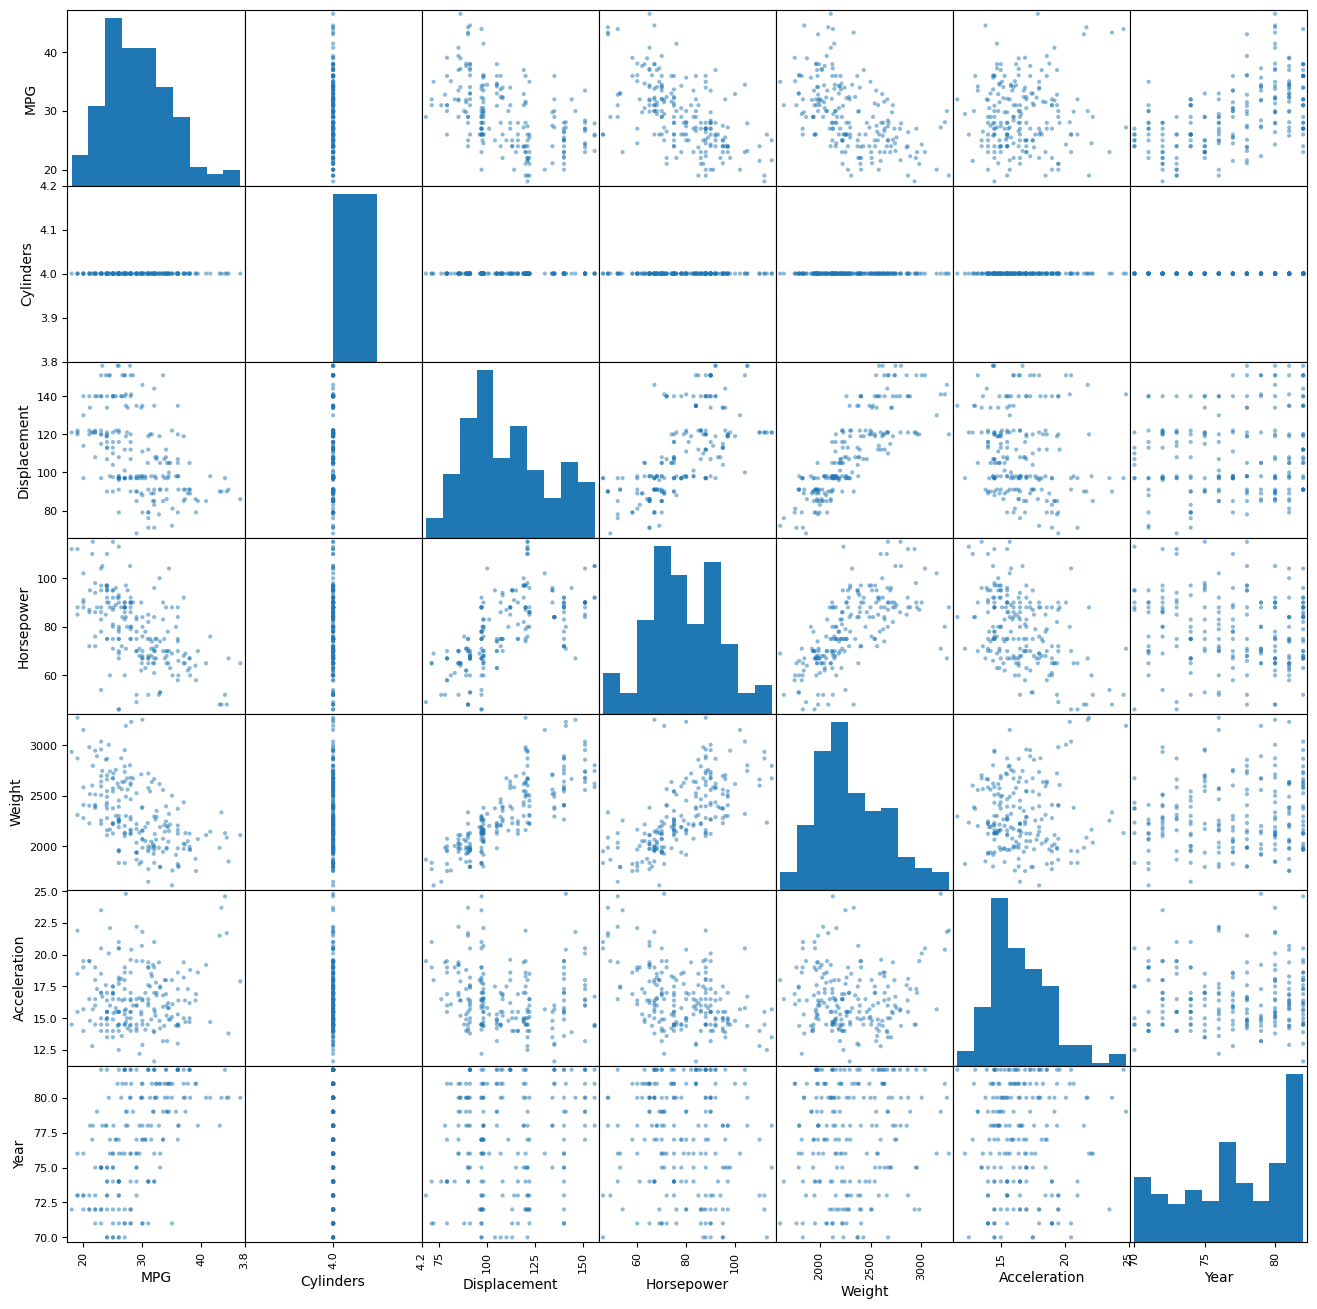

In [51]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_4cyl, figsize=(16,16), alpha=0.5, diagonal='hist')

# Set up data: Predictors and Target variable

In [52]:
df_4cyl = pd.get_dummies(df_4cyl,columns=['Origin'])

In [53]:
columns_to_consider = ['Displacement','Horsepower','Weight','Acceleration','Year','Origin_Europe','Origin_Japan','Origin_US']

In [54]:
X=df_4cyl[columns_to_consider].values
y=df_4cyl['MPG'].values

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
len(y_test)

41

In [56]:
X_test.shape

(41, 8)

In [57]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
columns_to_consider.append('Intercept')
columns_to_consider
coeff_df = pd.DataFrame({'Predictor':columns_to_consider, 'Coefficient':np.append(regression_model.coef_,regression_model.intercept_)})
coeff_df

,Predictor,Coefficient
0,Displacement,-0.024912
1,Horsepower,-0.045888
2,Weight,-0.007248
3,Acceleration,0.023609
4,Year,0.943730
5,Origin_Europe,0.073671
6,Origin_Japan,0.465143
7,Origin_US,-0.538814
8,Intercept,-20.811241


# Predicted Output

In [58]:
y_pred=regression_model.predict(X_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1=df.head(25)

#Evaluating Performance

# Visual comparison

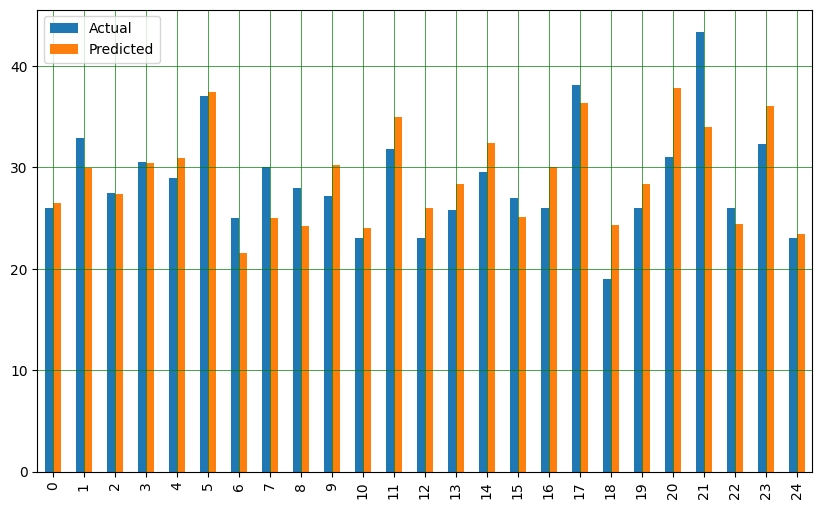

In [59]:
df1.plot(kind='bar', figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
plt.show()

# Root Mean Square Error

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.6321125117656625
Mean Squared Error: 11.463716122484891
Root Mean Squared Error: 3.385810999226757
